In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
import json
from matplotlib import font_manager as fm

import warnings 

warnings.filterwarnings('ignore')

font_path = './Data/fonts/OPTIFranklinGothic-Medium.otf'

prop = fm.FontProperties(fname=font_path)

In [7]:
ffp_vars = ['MO_LENGTH', 'USTAR', 'V_SIGMA', 'H', 'NEE', 'TA', 'ZL', 'WD', 'TIMESTAMP_START', 'TIMESTAMP_END', 'WS']
heights = pd.read_csv('./Data/BASE_MeasurementHeight_20240910.csv')
#heights = heights[heights.Site_ID.isin(sites)]
heights = heights[heights.Variable.isin(ffp_vars)]
heights = heights[['Site_ID','Variable','Height']]
heights.dropna(inplace=True)
heights.reset_index(drop=True, inplace=True)
heights

,Site_ID,Variable,Height
0,AR-CCa,H,3.8
1,AR-CCa,H,2.5
2,AR-CCa,MO_LENGTH,3.8
3,AR-CCa,MO_LENGTH,2.5
4,AR-CCa,TA,3.8
...,...,...,...
2199,US-YK2,WD,2.5
2200,US-YK2,WS,3.0
2201,US-YK2,WS,2.5
2202,US-YK2,ZL,3.0


In [19]:
data['Site ID'].tolist()

['CA-HPC',
 'CA-SCC',
 'CA-SMC',
 'CL-SDF',
 'US-CRK',
 'US-NC1',
 'US-NC2',
 'US-NC3',
 'US-Oho',
 'US-PFb',
 'US-PFc',
 'US-PFg',
 'US-PFh',
 'US-PFi',
 'US-PFj',
 'US-PFk',
 'US-PFL',
 'US-PFm',
 'US-PFn',
 'US-PFp',
 'US-PFq',
 'US-PFs',
 'US-PFt']

In [10]:
data = pd.read_csv('./Data/AmeriFlux_SiteList.tsv', sep='\t')
#sites = [f for f in data['Site ID'].tolist() if f in list(set(heights.Site_ID.tolist()))]
D = {}
for site in ['US-NC2']:#sites:
    #fname = [f for f in listdir('/home/aleksei/Documents/GEMS/Footprint/Data/AmeriFlux/Raw') if (site in f) and ('.csv' in f)][0]
    df = pd.read_csv(f'./Data/sites/AMF_US-NC2_BASE-BADM_15-5/AMF_US-NC2_BASE_HH_15-5.csv',skiprows=(0,1),
                na_values=-9999)
    df.dropna(subset=['H_1_1_1', 'V_SIGMA_1_1_1', 'USTAR_1_1_1', 'NEE_PI_1_1_1'], inplace=True)
    df = df[[s for s in df.columns if any(var in s for var in ffp_vars)]]
    #df.dropna(inplace=True)
    df['height'] = [heights[heights.Site_ID==site].Height.max()]*len(df)
    df['site'] = [site]*len(df)
    df['lon'] = [data[data['Site ID']==site]['Longitude (degrees)'].item()]*len(df)
    df['lat'] = [data[data['Site ID']==site]['Latitude (degrees)'].item()]*len(df)
    df['TIMESTAMP_START'] = pd.to_datetime(df['TIMESTAMP_START'], format="%Y%m%d%H%M")
    df['TIMESTAMP_END'] = pd.to_datetime(df['TIMESTAMP_END'], format="%Y%m%d%H%M")
    D[site] = df.reset_index(drop=True)
    

# df.drop('NEE_PI_F', axis=1, inplace=True)
# df.drop('TA_PI_F', axis=1, inplace=True)
# df.dropna(subset=['H'], inplace=True)

In [38]:
df.columns

Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'H2O_1_1_1', 'H_1_1_1', 'WD_1_1_1',
       'WS_1_1_1', 'USTAR_1_1_1', 'MO_LENGTH_1_1_1', 'RH_1_1_1', 'TA_1_1_1',
       'NEE_PI_F_1_1_1', 'SH_1_1_1', 'WS_MAX_1_1_1', 'ZL_1_1_1', 'TAU_1_1_1',
       'V_SIGMA_1_1_1', 'NEE_PI_1_1_1', 'FCH4_1_1_1', 'CH4_1_1_1', 'height',
       'site', 'lon', 'lat'],
      dtype='object')

In [11]:
#site = 'US-Oho'
columns = ['TIMESTAMP_START', 'NEE_PI_1_1_1', 'H_1_1_1', 'WS_1_1_1', 'WD_1_1_1', 
           'USTAR_1_1_1', 'ZL_1_1_1', 'MO_LENGTH_1_1_1', 'V_SIGMA_1_1_1', 'TA_1_1_1', 
           'height', 'site', 'lat', 'lon']
rename_dict = {col: col.replace('_PI', '').replace('_1_1_1', '') for col in columns}

df = D[site].rename(columns=rename_dict)[ffp_vars+['lat']]
df

,MO_LENGTH,USTAR,V_SIGMA,H,NEE,TA,ZL,WD,TIMESTAMP_START,TIMESTAMP_END,WS,lat
0,46.900519,0.201600,0.388151,-15.432859,0.326294,5.36885,0.291553,119.893811,2011-01-01 08:00:00,2011-01-01 08:30:00,1.891332,35.803
1,-236.560899,0.230362,0.470655,4.566403,0.704769,6.95793,-0.057803,118.330528,2011-01-01 09:00:00,2011-01-01 09:30:00,1.882714,35.803
2,-49.916256,0.365629,0.454011,86.551780,-4.443866,10.24170,-0.273939,123.080508,2011-01-01 10:00:00,2011-01-01 10:30:00,1.522266,35.803
3,-31.284597,0.368056,0.437539,140.851404,-4.407046,10.84550,-0.437084,121.772042,2011-01-01 10:30:00,2011-01-01 11:00:00,1.405634,35.803
4,-37.391373,0.334272,0.508784,88.248059,-5.375340,11.97720,-0.365699,117.571393,2011-01-01 11:00:00,2011-01-01 11:30:00,1.364776,35.803
...,...,...,...,...,...,...,...,...,...,...,...,...
95577,-31.202700,0.386526,0.727008,163.621000,-7.782090,33.81765,-0.844639,311.262000,2024-06-30 13:00:00,2024-06-30 13:30:00,1.998130,35.803
95578,-28.697900,0.363725,0.776876,148.218000,-6.267910,34.05579,-0.918360,304.193000,2024-06-30 13:30:00,2024-06-30 14:00:00,2.017520,35.803
95579,-157.011000,0.423976,0.596963,42.883200,-5.853100,33.62494,-0.167855,301.962000,2024-06-30 14:00:00,2024-06-30 14:30:00,2.198150,35.803
95580,-64.905800,0.352663,0.597757,59.719300,-8.668420,31.88802,-0.406050,302.772000,2024-06-30 15:00:00,2024-06-30 15:30:00,1.849370,35.803


In [12]:
neutral_cri = 0.05
Cn = 0.3
C1 = 3.8
C2 = 2.28
omega = 7.2921 * 10e-5
gamma = 0.01
A = 0.2
B = 2.5
C = 8
k = 0.4 
g = 9.81
#f = 2*omega * np.sin(lat * np.pi/180)

In [13]:
#==========Stable case, Equation (B1) in Kljun 2015: MO_Length > 0.05==========
mask = (~df['ZL'].isna()) & (df['ZL'] > 0)

df.loc[mask, 'pbl'] = (
    df.loc[mask, 'MO_LENGTH'] / C1 *
    (-1 + np.sqrt(1 + C2 * df.loc[mask, 'USTAR'] / 
                  (
                      2*omega * np.sin(df.loc[mask, 'lat'] * np.pi/180) * df.loc[mask, 'MO_LENGTH'])
                  )
    )
)

#==========Neutral case Equation (B2) in Kljun 2015: USTAR <= 0.05==========
mask = (~df['ZL'].isna()) & (df['ZL'] == 0)

df.loc[mask, 'pbl'] = (
    Cn * df.loc[mask, 'USTAR'] / abs(2*omega * np.sin(df.loc[mask, 'lat'] * np.pi/180))
)

#==========Negative Sensible Heat Flux (night/dawn)==========
mask = df['pbl'].isna() & (df['H'] < 0)

df.loc[mask, 'pbl'] = (
    Cn * df.loc[mask, 'USTAR'] / abs(2*omega * np.sin(df.loc[mask, 'lat'] * np.pi/180))
)

In [14]:
na_ls = df.index[df['pbl'].isna()].tolist()#[1:]
hr=0.5
#Euler method
for l1 in range(len(na_ls)):
    index = na_ls[l1]
    prev_index = index - 1

    df.loc[index, 'dhdt'] = (
        hr * 60 *  # Convert from m s-1 to per averaging interval
        df.loc[prev_index, 'H'] / gamma *
        (
            (df.loc[prev_index, 'pbl'] ** 2 /
             ((1 + 2 * A) * df.loc[prev_index, 'pbl'] - 2 * B * k * df.loc[prev_index, 'MO_LENGTH'])
            ) +
            (C * df.loc[prev_index, 'USTAR'] ** 2 * df.loc[prev_index, 'TA'] /
             (gamma * g * ((1 + A) * df.loc[prev_index, 'pbl'] - B * k * df.loc[prev_index, 'MO_LENGTH']))
            )
        ) ** (-1)
    )
    df.loc[index, 'pbl'] = df.loc[prev_index, 'pbl'] + df.loc[index, 'dhdt']

In [48]:
df[df['pbl'].isna()]

,MO_LENGTH,USTAR,V_SIGMA,H,NEE,TA,ZL,WD,TIMESTAMP_START,TIMESTAMP_END,WS,lat,pbl,dhdt
1647,-197.501808,0.612207,1.218893,102.185312,-10.404175,NaN,-0.069235,23.534302,2011-03-09 09:30:00,2011-03-09 10:00:00,2.859938,35.803,NaN,NaN
1648,-230.573901,0.803481,1.390243,199.514702,-13.519476,12.6301,-0.059304,25.982047,2011-03-09 10:00:00,2011-03-09 10:30:00,4.025873,35.803,NaN,NaN
1649,-123.569205,0.749706,1.695934,302.371132,-14.786162,13.8096,-0.110659,34.469039,2011-03-09 11:00:00,2011-03-09 11:30:00,3.648373,35.803,NaN,NaN
1650,-145.116876,0.835603,1.470331,356.370244,-14.968960,14.6729,-0.094227,33.828000,2011-03-09 11:30:00,2011-03-09 12:00:00,3.879578,35.803,NaN,NaN
1651,-193.876928,0.732059,1.174537,179.324243,-12.711161,15.7071,-0.070529,45.130015,2011-03-09 12:30:00,2011-03-09 13:00:00,3.156884,35.803,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93841,-22.149800,0.413376,1.001694,280.906000,-7.668480,NaN,-1.189850,337.733000,2024-04-14 14:00:00,2024-04-14 14:30:00,2.013640,35.803,NaN,NaN
93842,-16.443800,0.346833,0.741146,223.403000,-5.019750,NaN,-1.602730,336.862000,2024-04-14 14:30:00,2024-04-14 15:00:00,2.132780,35.803,NaN,NaN
93843,-27.179500,0.393861,0.952862,197.868000,-6.530760,NaN,-0.969666,345.310000,2024-04-14 15:00:00,2024-04-14 15:30:00,2.301710,35.803,NaN,NaN
93844,-14.749900,0.263010,0.890071,108.550000,-3.437820,NaN,-1.786790,353.228000,2024-04-14 15:30:00,2024-04-14 16:00:00,2.137920,35.803,NaN,NaN


In [15]:
df.pbl.max()

3449750.00195007

In [16]:
df[(df.pbl<0)|(df.pbl>5000)] = np.nan
#df[(df.USTAR<0.1)] = 0.1
print(df['pbl'].isna().sum())
df['pbl'].interpolate(limit=3, axis=0, inplace=True)
print(df['pbl'].isna().sum())

22859
16605


In [17]:
df.dropna(inplace=True)
df = df.sort_values(by='TIMESTAMP_START')
df.reset_index(drop=True, inplace=True)
df

,MO_LENGTH,USTAR,V_SIGMA,H,NEE,TA,ZL,WD,TIMESTAMP_START,TIMESTAMP_END,WS,lat,pbl,dhdt
0,-236.560899,0.230362,0.470655,4.566403,0.704769,6.95793,-0.057803,118.330528,2011-01-01 09:00:00,2011-01-01 09:30:00,1.882714,35.803,2189.888315,2158.616723
1,-49.916256,0.365629,0.454011,86.551780,-4.443866,10.24170,-0.273939,123.080508,2011-01-01 10:00:00,2011-01-01 10:30:00,1.522266,35.803,2199.997695,10.109380
2,-31.284597,0.368056,0.437539,140.851404,-4.407046,10.84550,-0.437084,121.772042,2011-01-01 10:30:00,2011-01-01 11:00:00,1.405634,35.803,2370.584238,170.586543
3,-37.391373,0.334272,0.508784,88.248059,-5.375340,11.97720,-0.365699,117.571393,2011-01-01 11:00:00,2011-01-01 11:30:00,1.364776,35.803,2624.831134,254.246896
4,-59.307964,0.346859,0.559845,62.143251,-5.313739,13.18600,-0.230559,120.845218,2011-01-01 11:30:00,2011-01-01 12:00:00,1.964490,35.803,2768.908019,144.076885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29316,-16.316700,0.363470,0.598225,260.706000,-8.561400,32.41994,-1.615210,322.148000,2024-06-30 11:00:00,2024-06-30 11:30:00,1.800250,35.803,3902.908665,287.584382
29317,-17.671100,0.365318,0.654828,244.298000,-8.095430,32.78730,-1.491420,320.855000,2024-06-30 11:30:00,2024-06-30 12:00:00,2.126900,35.803,4185.127718,282.219053
29318,-13.501500,0.347148,0.824194,274.311000,-11.415900,33.18435,-1.952000,331.701000,2024-06-30 12:00:00,2024-06-30 12:30:00,1.879650,35.803,4431.766806,246.639088
29319,-23.008800,0.389588,0.765580,227.329000,-9.886720,33.64999,-1.145430,310.047000,2024-06-30 12:30:00,2024-06-30 13:00:00,2.122180,35.803,4692.858594,261.091788


In [372]:
df.to_csv('./Data/US-Oho_footprint_dataset.csv', index=None)

In [23]:
for group, indexes in df.groupby(pd.Grouper(key='TIMESTAMP_START', freq='M')):
    print(indexes)
    idx0, idx = indexes.index.values[0], indexes.index.values[-1]

       MO_LENGTH     USTAR   V_SIGMA           H       NEE        TA  \
0    -236.560899  0.230362  0.470655    4.566403  0.704769   6.95793   
1     -49.916256  0.365629  0.454011   86.551780 -4.443866  10.24170   
2     -31.284597  0.368056  0.437539  140.851404 -4.407046  10.84550   
3     -37.391373  0.334272  0.508784   88.248059 -5.375340  11.97720   
4     -59.307964  0.346859  0.559845   62.143251 -5.313739  13.18600   
..           ...       ...       ...         ...       ...       ...   
292 -4216.214496  0.590906  0.924083    4.326119  0.863932   2.21105   
293 -3292.994997  0.566518  0.962623    4.882772  1.093982   2.22970   
294 -3978.893935  0.604624  0.958712    4.912534  0.648855   2.20481   
295 -6342.169549  0.662123  0.991419    4.046964  0.579061   2.18183   
296 -4019.899571  0.535987  0.918715    3.387291  1.238734   2.22783   

           ZL          WD     TIMESTAMP_START       TIMESTAMP_END        WS  \
0   -0.057803  118.330528 2011-01-01 09:00:00 2011-01-01

IndexError: index 0 is out of bounds for axis 0 with size 0

# Model Footprint

In [10]:
import importlib
from FFP_Model import calc_footprint_FFP
from FFP_Model import calc_footprint_FFP_climatology 

In [11]:
importlib.reload(calc_footprint_FFP)
importlib.reload(calc_footprint_FFP_climatology)

<module 'FFP_Model.calc_footprint_FFP_climatology' from '/home/aleksei/Documents/GEMS/Footprint/FFP_Model/calc_footprint_FFP_climatology.py'>


Alert(0014):
 No valid z0 passed, using umean.
 Execution continues.

Calculating footprint  1  of  225
Calculating footprint  12  of  225

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  23  of  225
Calculating footprint  34  of  225
Calculating footprint  45  of  225
Calculating footprint  56  of  225

Error(0009):
 ustar (friction velocity) must be >=0.1.
 Execution continues.

Error(0016):
 At least one required input is invalid. Skipping current footprint.
 Execution continues.
Calculating footprint  67  of  225
Calculating footprint  78  of  225
Calculating footprint  89  of  225
Calculating footprint  100  of  225
Calculating footprint  111  of  225
Calculating footprint  122  of  225
Calculating footprint  133  of  225
Calculating footprint  144  of  225

Error(0009):
 ustar (f

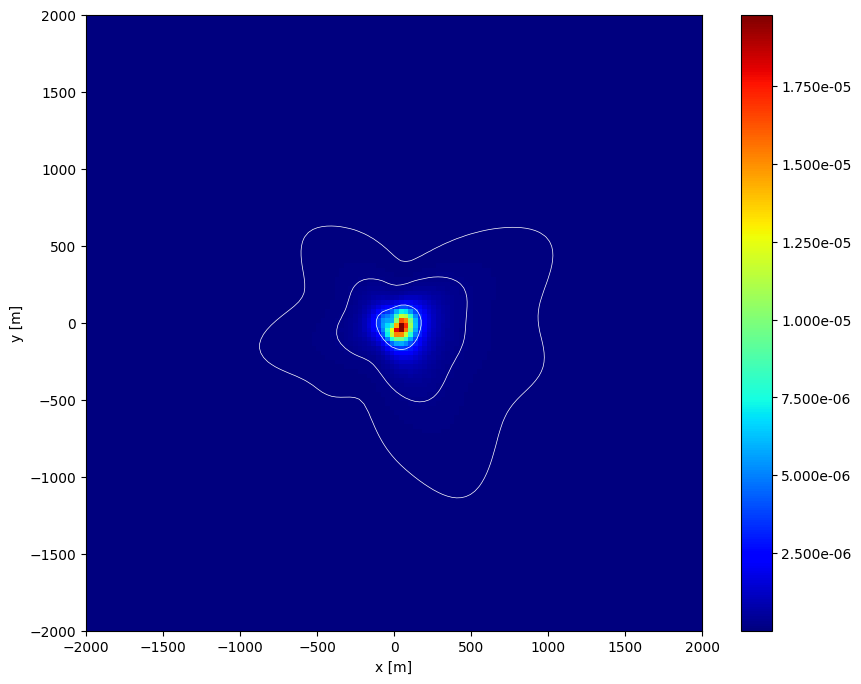

In [352]:
for group, indexes in df.groupby(pd.Grouper(key='TIMESTAMP_START', freq='M')):
    idx0, idx = indexes.index.values[0], indexes.index.values[-1]
    params, fig = calc_footprint_FFP_climatology.FFP_climatology(
                zm=df.loc[idx0:idx,'height'].tolist(),
                z0=None,
                umean=df.loc[idx0:idx,'WS'].tolist(),
                h=df.loc[idx0:idx,'pbl'].tolist(),
                ol=df.loc[idx0:idx,'MO_LENGTH'].tolist(),
                sigmav=df.loc[idx0:idx,'V_SIGMA'].tolist(),
                ustar=df.loc[idx0:idx,'USTAR'].tolist(),
                wind_dir=df.loc[idx0:idx,'WD'].tolist(),
                flag_err=0,
                rs=[50, 80, 90],
                domain = [-2000, 2000, -2000,2000],
                dx=30, 
                dy=30,
                smooth_data=0,
                fig=True)
    for key in params.keys():
        if type(params[key]) == np.ndarray:
            params[key] = params[key].tolist()
    with open(f'./Us-Oho/Monthly/{indexes.TIMESTAMP_START.dt.strftime("%Y_%m").values[0]}.json', 'w') as json_file:
        json.dump(params, json_file, indent=4)
    fig.savefig(f'./Us-Oho/Monthly/{indexes.TIMESTAMP_START.dt.strftime("%Y_%m").values[0]}.png')

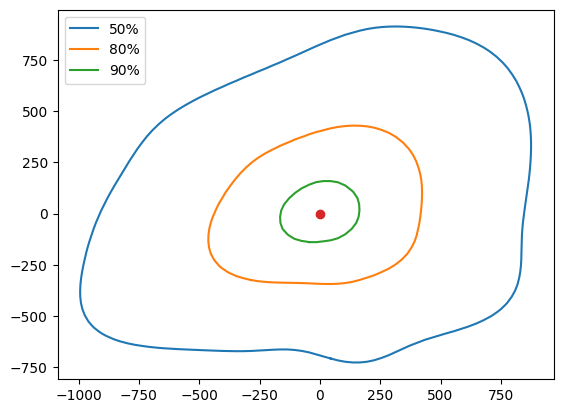

In [314]:
plt.plot(params['xr'][-1],params['yr'][-1], label='50%')
plt.plot(params['xr'][-2],params['yr'][-2], label='80%')
plt.plot(params['xr'][-3],params['yr'][-3], label='90%')
plt.plot(0,0,marker='o')
plt.legend()

In [12]:
import gc

In [ ]:
for idx in range(len(df)):
    params, fig = calc_footprint_FFP.FFP(
                zm=df.loc[idx,'height'],
                z0=None,
                umean=df.loc[idx,'WS'],
                h=df.loc[idx,'pbl'],
                ol=df.loc[idx,'MO_LENGTH'],
                sigmav=df.loc[idx,'V_SIGMA'],
                ustar=df.loc[idx,'USTAR'],
                wind_dir=df.loc[idx,'WD'],
                flag_err=0,
                rs=[50, 80, 90],
                domain = [-2000, 2000, -2000,2000],
                dx=30, 
                dy=30,
                fig=True)
    for key in params.keys():
        if type(params[key]) == np.ndarray:
            params[key] = params[key].tolist()
    with open(f'./Us-Oho/Min/{df.TIMESTAMP_START.dt.strftime("%Y_%m_%d_%H_%M").values[idx]}.json', 'w') as json_file:
        json.dump(params, json_file, indent=4)
    fig.savefig(f'./Us-Oho/Min/{df.TIMESTAMP_START.dt.strftime("%Y_%m_%d_%H_%M").values[idx]}.png')
    print(f'{idx+1}/{len(df)}')
    del params, fig
    gc.collect()

1/8587
2/8587
3/8587
4/8587
5/8587
6/8587
7/8587
8/8587
9/8587
10/8587
11/8587

Error(0007):
 zm/ol (measurement height to Obukhov length ratio) must be equal or larger than -15.5.
12/8587
13/8587
14/8587
15/8587
16/8587
17/8587
18/8587
19/8587
20/8587
21/8587
